<a href="https://colab.research.google.com/github/Tahimi/convectionDiffusion/blob/main/advectionDiffusion1D_FiniteDiference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# space discretization
xL = 0.
xR = 10.
dx = 0.1
delX = xR - xL
nx = int(delX/dx)
x = np.linspace(xL, xR, nx+1)

In [3]:
# time discretization
# advection
Cr = 0.2 # Courant Number: Cr = u*dt/dx
u = 20.
dtAdv = Cr*dx/u
# diffusion
Fr = 0.4 # Fourier Number: Fr = D*dt/dx**2
D = 4.
dtDiff = Fr*dx**2/D
# advectionDiffusion
dt = min(dtAdv, dtDiff)
print('dtAdv = ', dtAdv, '\n'
      'dtDiff = ', dtDiff, '\n'
      'dt = min(dtAdv, dtDiff) = ', dt)
# simulation time
delT = 0.3
stepsNbr = int(delT/dt)

dtAdv =  0.0010000000000000002 
dtDiff =  0.0010000000000000002 
dt = min(dtAdv, dtDiff) =  0.0010000000000000002


In [4]:
# defining the unkown's distribution
def yInit_(x, yMin, yMax, xc, width, isRectangular = True):
  if isRectangular:
    # rectangular distribuition
    return np.array([yMax if xc-width < xi and xi < xc+width else yMin for xi in x])
  else:
    # Gaussian distribuition
    return yMin + yMax * np.exp(-(x - xc) ** 2 / (2 * width ** 2))

In [5]:
# initialization
yMin = 0.
yMax = 1.
xc = 2.5
width = 0.5

def initialize():
    # unkown's initialization
    global x, yMin, yMax, xc, width, yInit, y
    yInit = yInit_(x=x,
                   yMin=yMin,
                   yMax=yMax,
                   xc=xc,
                   width=width,
                   isRectangular = False)
    y = np.copy(yInit)

In [6]:
# defining the time-step update function
# oneStepExplicitFirstOrderAdvectionDiffusion
def advectAndDiffuse(yIN, Cr, Fr):
  # only valid for, u > 0
  yOUT = np.zeros_like(yIN)
  # internal points
  for i in range(1,len(x)-1):
    yOUT[i] = (Cr+Fr)*yIN[i-1] + (1.-Cr-2*Fr)*yIN[i] + Fr*yIN[i+1]
  # second order accurate diffusion at upstream BC
  yOUT[0] = (1.-2*Fr)*yIN[0] + 2.*Fr*yIN[1]
  # absorbing BC at downstream BC
  yOUT[-1] = Cr*yIN[-2] + (1.-Cr)*yIN[-1]
  return yOUT

In [7]:
# displaying some parameters
print('dx = ', dx, '\n'
      'delX = ', delX, '\n'
      'nx = ', nx, '\n'
      'Cr = ', Cr, '\n'
      'u = ', u, '\n'
      'dtAdv = ', dtAdv, '\n'
      'Fr = ', Fr, '\n'
      'D = ', D, '\n'
      'dtDiff = ', dtDiff, '\n'
      'dt = min(dtAdv,dtDiff) = ', dt, '\n'
      'delT = ', delT, '\n'
      'stepsNbr = ', stepsNbr)

dx =  0.1 
delX =  10.0 
nx =  100 
Cr =  0.2 
u =  20.0 
dtAdv =  0.0010000000000000002 
Fr =  0.4 
D =  4.0 
dtDiff =  0.0010000000000000002 
dt = min(dtAdv,dtDiff) =  0.0010000000000000002 
delT =  0.3 
stepsNbr =  299


In [8]:
# initialize and iterate in time
initialize()
for step in range(stepsNbr):
  y = advectAndDiffuse(y, Cr, Fr)

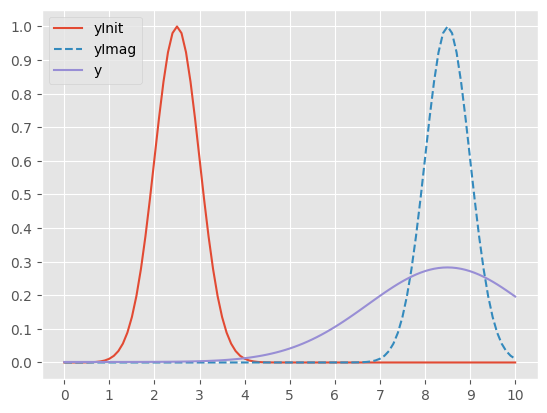

In [9]:
#ploting the simulation results
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xticks(np.arange(xL, xR+.1, 1))
plt.yticks(np.arange(yMin, yMax+.1, .1))
plt.plot(x, yInit, label='yInit')
yImag = yInit_(x=x,
               yMin=yMin,
               yMax=yMax,
               xc=xc+u*delT,
               width=width,
               isRectangular = False)
plt.plot(x, yImag, '--', label='yImag')
plt.plot(x, y, label='y')
plt.legend()
plt.show()